In [4]:
# CONCOLUTIONAR NN
# The difference between NN and CNN is that uses the convolution to locate features of an image. And it
# uses multiple instances of this convolution that enable it to condense for example an image.
# these convolutions are done by making a smaller square on the image, moving it around and saving each piece.
# Then the machine takes each small features and uses them to create a new condensed version of this image
# using the pieces (features). Then follows a process of polling where the maximum value inside each window
# is chosen and then replaces the part of image with this piece.
# So in summary CNN is drastically simplifying the image and looking for features in it.
# Simple: Reduces your image to simple building blocks and then finds patterns of these blocks given how many
# layers you have.

import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

# We generally don't need a class for this, but in our case (image processing) there are quite a few steps
# we are/have to make like the same methods and functions...
# Important note to make here is that for iamge classification many trick can be used to make our dataset
# more rounded and higher the accuarcy of generalization. These tricks involve: croping images, resizing
# them and adding white spaces or even rotating them and using the reotated versions as new images which
# can increase the ammount of our data by 4x (4 ways of rotating an image) or more...
class DogsVSCats():
    IMG_SIZE = 50 # 50x50 pixels
    CATS = "Kaggle/PetImages/Cat"
    DOGS = "Kaggle/PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    # A important fact to mention is the importance of balanced ammount of data for each class we are trying
    # to disscerne. Therefore we will create counters here for each class
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        # iterate trough our dictionary of classes
        for label in self.LABELS:
            print(label)
            # iterate trough images in directory
            for f in tqdm(os.listdir(label)):
                try: 
                    # We use the os.path.join functrion to add a label (0 or 1) to each image
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # converting to GRAYSCALE is not a necessity
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                    
                except Exception as e:
                    # For some images there is an exception, maybe it's because they are corrupted or 
                    # maybe it's the resize...
                    pass
                    #print(str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)

# if we want to rebuild everything (takes long time)
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()
    

Kaggle/PetImages/Cat


100%|██████████| 12501/12501 [00:41<00:00, 304.43it/s]


Kaggle/PetImages/Dog


100%|██████████| 12501/12501 [00:41<00:00, 298.67it/s]


Cats: 12476
Dogs: 12470


In [5]:
# We extract the training data so we don't have to create it again, for speeds sake
# There is an issue with the pickle function.
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


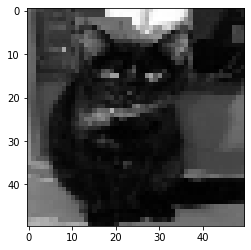

In [14]:
# We can use matplotlib to plot the image
import matplotlib.pyplot as plt
# We add gray to the plot function so we can better see what the CNN sees
plt.imshow(training_data[0][0], cmap="gray")
plt.show()